# 目次

 - matplotlibとは
 - 簡単な1次元プロット
     - 基礎
     - 応用
 - ヒストグラム
     - 基礎
     - 応用
 - 2通りの図の作成方法
     1. matplotlib.pyplotモジュールの関数を用いた図生成
     2. matplotlib内のクラスを用いた図生成


# matplotlibとは

matplotlibとは、Pythonで主に2次元の図を描画するときなどに使われる標準的なライブラリです。  
このライブラリ一つで、学生が研究の際に作成するレベルの図はおおよそ作成することが可能です。  
また、図だけでなくアニメーションを作成することも出来ます(別ファイル参照)。  
ドキュメントは[http://matplotlib.org/](http://matplotlib.org/)を参照してください。

In [1]:
# matplotlibライブラリのインポート
import matplotlib.pyplot as plt

#↓この1行により、matplotlibで作成した図をJupyterに埋め込むことが出来ます
%matplotlib inline 

# 簡単な1次元プロット
## 基礎
まずは簡単な1次元の時系列の図を作成してみます。  
plt.plot([横軸の値],[縦軸の値])  
これだけで描写が可能です。

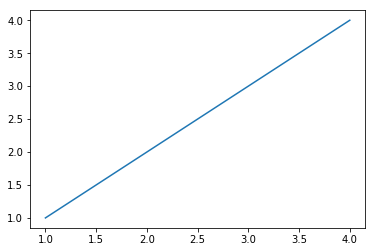

In [2]:
import numpy as np
t=np.array([1,2,3,4])
y=t

plt.plot(t,y)
plt.show() #図を出力する

複数の時系列を1つの図に重ねて描きたいときには、  
plt.plot([横軸の値],[縦軸の値])  
を続けて入力します。

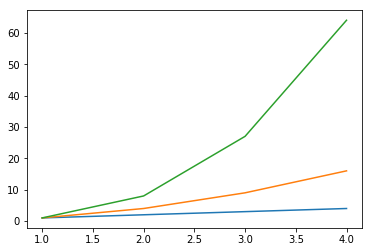

In [3]:
t=np.array([1,2,3,4])
y1=t
y2=t**2
y3=t**3
plt.plot(t,y1)
plt.plot(t,y2)
plt.plot(t,y3)
plt.show()

## 応用
色々なモジュールやオプションを使いこなすで、線のデザインを変えたりラベルをつけたりすることが出来ます。

| モジュール名 | 内容 |
|:-----------:|:------------|
|figure|figsizeで、図の縦・横の長さを指定する。plotで図示する前に用いる。|
|title|図にタイトルを付ける。|
|xlabel(ylabel)|図のx軸(y軸)にラベルを付ける。|
|xticks(yticks)|図のx軸(y軸)の目盛りを指定する。|
|text|図内に文字を挿入する。plt.text([x座標],[y座標],[文字列])|
|legend|図内の各プロットのラベルを表示する。locでラベルの場所を指定する。|
|xlim(ylim)|図のx軸(y軸)方向の表示する範囲を指定する。|


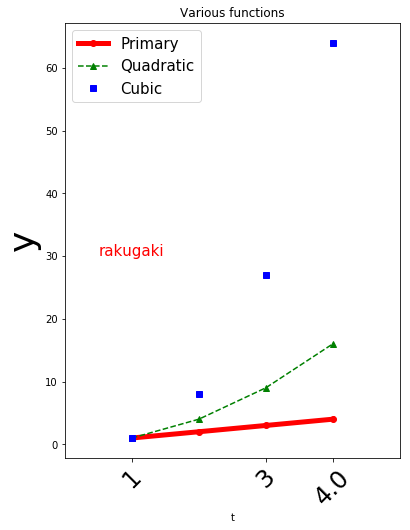

In [4]:
plt.figure(figsize=(6,8))      
plt.plot(t,y1,'o-',color='red',label='Primary',linewidth=5.0)
plt.plot(t,y2,'^--',color='green',label='Quadratic')
plt.plot(t,y3,'s',color='blue',label='Cubic')
plt.title('Various functions') 
plt.xlabel('t')                
plt.ylabel('y',fontsize=36)    
plt.xticks([1,3,4],[1,3,4.0],fontsize=24,rotation=45)             
plt.text(0.5,30.0,"rakugaki", fontsize=15, color="red") 
plt.legend(loc='upper left',fontsize=15)                
plt.xlim(0.0,5.0)              
plt.show()

また、plt.subplotモジュールを用いることで、1つのファイルの中に複数の図を作成することが可能です。

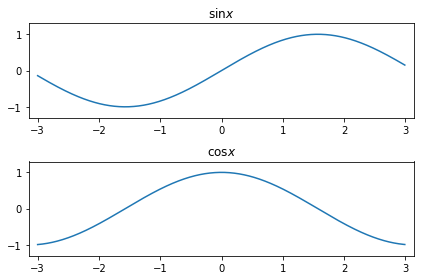

In [5]:
x=np.arange(-3,3,0.01)
y1=np.sin(x)
y2=np.cos(x)

#y1のプロット
plt.subplot(2,1,1)
plt.plot(x,y1)
plt.title(r"$\sin x$")
plt.xlim(-np.pi,np.pi)
plt.ylim(-1.3,1.3)

#y2のプロット
plt.subplot(2,1,2)
plt.plot(x,y2)
plt.title(r"$\cos x$")
plt.xlim(-np.pi,np.pi)
plt.ylim(-1.3,1.3)

plt.tight_layout()
plt.show()

# ヒストグラム
## 基礎
plt.plotの代わりに、plt.histを用います。

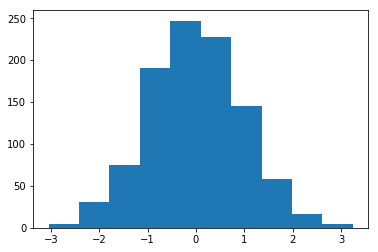

In [6]:
x = np.random.randn(1000)  #平均0、標準偏差1の乱数を1000個生成する

plt.hist(x)

plt.show()

## 応用
| オプション | 内容 |
|:-----------:|:------------|
|normed|縦軸を規格化するかのオプション。規格化する(つまり縦軸を確率にする)場合は、normed=Trueとする|
|bins|ヒストグラムの幅を調整できる|
|alpha|図の透過度を0~1の値で調整できる。0で完全に透過、1.0で透過なし|
|range|ヒストグラムを表示させる範囲を指定する|


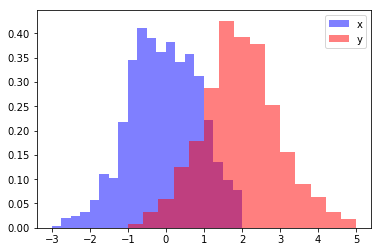

In [7]:
x1 = np.random.randn(1000)  #平均0、標準偏差1の乱数を1000個生成する
x2 = np.random.randn(1000) + 2.0  #平均2、標準偏差1の乱数を1000個生成する

plt.hist(x1, normed=True, label = "x", bins = 20, range = (-3, 2), alpha = 0.5, color = "blue")
plt.hist(x2, normed=True, label = "y", bins = 20, range = (-3, 5), alpha = 0.5, color = "red")
plt.legend()
plt.show()
plt.show()

# 2通りの図の作成方法
実は、matplotlibで図を作成するのには、以下の2つの方法があります。  
 
## 1. matplotlib.pyplotモジュールの関数を用いて図を作成する方法
plt.plot, plt.xlabelなど、pltモジュールの関数を用いて図の詳細を順々に指定してやる方法です。  
**非常に直感的でわかりやすい方法ですので、ちょっとデータを見たいときなどには重宝します。  **  
一方で、例えば「1つのファイルに複数の図を載せる」場合、plt.subplotで次の図の詳細を記述し始めると前の図の詳細の記述に戻れないなど、細かい図を作成するときにはやや不便です。

ここまで作成してきた図は、すべてこの1.の方法を用いて作成してきました。

## 2.matplotlib内のクラスを用いて図を作成する方法
matplotlib.pyplot.figure関数でFigureオブジェクトを作成し、図の詳細を追加していく方法です。
大まかな流れとしては、

 ①. matplotlib.pyplot.figure関数でFigureオブジェクトを生成する  
 ②. Figureオブジェクトのメソッド(.add_subplot, .add_axesなど)を用いて、Axesオブジェクトを生成する  
 ③. Axesオブジェクトのメソッド(.plot, .histなど)にデータを渡してプロットする  
 ④. 必要ならば、Axesオブジェクトのメソッド(.set_xlim, set_titleなど)を用いて図を調整する  

すなわち、1.の方法ではFigureオブジェクトが暗黙的に作られていたのに対し、2.の方法ではFigureオブジェクトを明示的に生成することになります。  
**記述量が多くなりますが、より自由に描写を操作することが可能になります。**

例えば、「簡単な1次元プロット/応用」の図は、2.の方法を用いると以下のように記述することが出来ます。

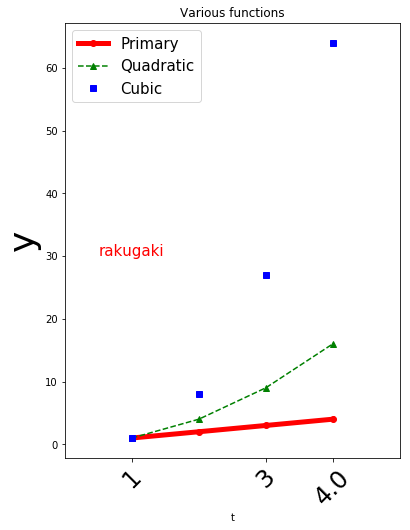

In [8]:
t=np.array([1,2,3,4])
y1=t
y2=t**2
y3=t**3

# Figureオブジェクトを生成
fig=plt.figure(figsize=(6,8))

# Axesオブジェクトを生成
ax=fig.add_subplot(1,1,1)

# 図のプロット
ax.plot(t,y1,'o-',color='red',label='Primary',linewidth=5.0)
ax.plot(t,y2,'^--',color='green',label='Quadratic')
ax.plot(t,y3,'s',color='blue',label='Cubic')

# 図の調整
ax.set_title('Various functions') 
ax.set_xlabel('t')                
ax.set_ylabel('y',fontsize=36)    
ax.set_xticks([1,3,4])
ax.set_xticklabels(['1','3','4.0'],fontsize=24,rotation=45)             
ax.text(0.5,30.0,"rakugaki", fontsize=15, color="red") 
ax.legend(loc='upper left',fontsize=15)                
ax.set_xlim(0.0,5.0)              

plt.show()

特に、以下のような「1つのファイルに複数の図を載せる」場合には、2.の方が記述しやすいでしょう。

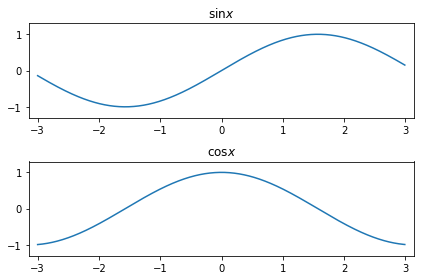

In [9]:
x=np.arange(-3,3,0.01)
y1=np.sin(x)
y2=np.cos(x)

# Figureオブジェクトを生成
fig=plt.figure()

# Axesオブジェクトを生成
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# Axesオブジェクトのメソッドにデータを渡してプロットする
ax1.plot(x,y1)
ax2.plot(x,y2)

# Axesオブジェクトのメソッドを用いて図を調整
ax1.set_title(r"$\sin x$")
ax2.set_title(r"$\cos x$")
ax1.set_xlim(-np.pi,np.pi)
ax2.set_xlim(-np.pi,np.pi)
ax1.set_ylim(-1.3,1.3)
ax2.set_ylim(-1.3,1.3)

fig.tight_layout()
plt.show()

上記を見たら分かる通り、「matplotlib.pyplotのモジュール名」と、「Axesオブジェクトのメソッド名」は異なる場合があるので注意が必要です。

| matplotlib.pyplotのモジュール名 | Axesオブジェクトのメソッド名 |
|:-----------:|:------------:|
|plot|plot|
|title|set_title|
|xlabel|set_xlabel|
|xticks|set_xticks & set_xticklabels |
|text|text|
|legend|legend|
|xlim|set_xlim|

状況に応じて、2つの方法を自在に使い分けられるようにしましょう。  
